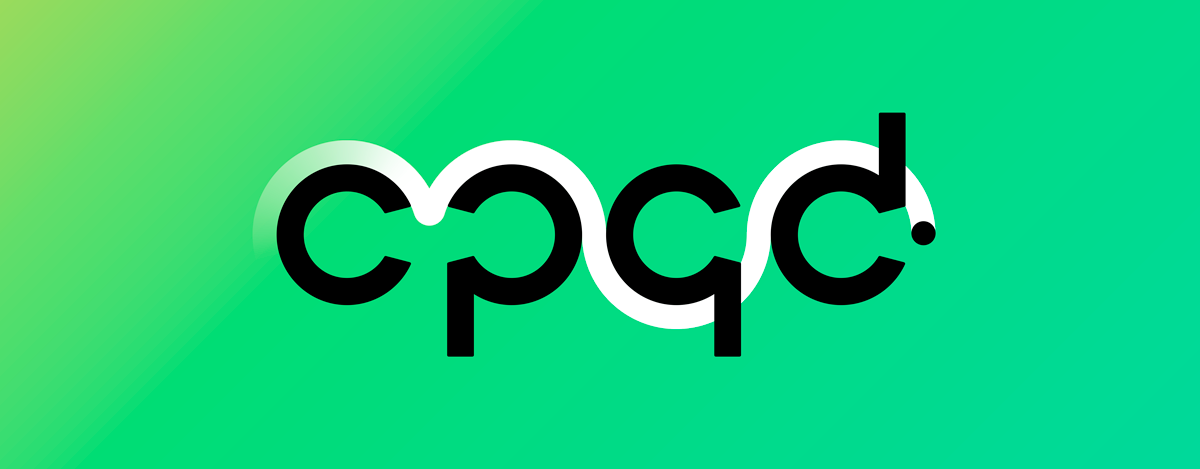

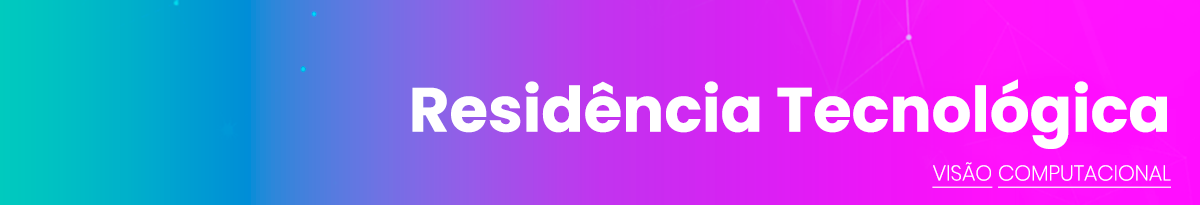

# 1. Image classification CIFAR100

## 1.1 Descrição

Este conjunto de dados é igual ao CIFAR-10, exceto que possui 100 classes contendo 600 imagens cada. Existem 500 imagens de treinamento e 100 imagens de teste por classe. As 100 classes do CIFAR-100 são agrupadas em 20 superclasses. Cada imagem vem com um rótulo "fino" (a classe à qual pertence) e um rótulo "grosseiro" (a superclasse à qual pertence).

[Documentação](https://www.tensorflow.org/datasets/catalog/cifar100?hl=en)

##  1.2 Sorteio dos temas

Ordem dos datasets para o sorteio dos temas:
1. Cifar100
2. Food101
3. Oxford Flowers102

Os nomes dos datasets foram inseridos e sorteados online [aqui](https://sorteador.com.br/sorteio-de-nomes).

A ordem alfabética dos nomes de cada residente do grupo receberá a respectiva ordem de sorteio do dataset.



## 1.3 Requisitos

Execute os requisitos conforme a necessidade da técnica escolhida.

Você tem total liberdade para escolher a técnica para resolver esse problema.

1. Carregue o dataset
2. Pré-processe o dataset conforme necessário
3. Treine um modelo de classificação
4. Avalie os resultados desse treinamento
5. Avalie o modelo em um subset de testes

Documente suas ações usando blocos de texto

Plote gráficos/imagens de exemplos

## 1.4 Documentação

TensorFlow Datasets [documentação disponível aqui](https://www.tensorflow.org/datasets/overview?hl=en)

# 2. Plano de ação

### Plano de Ação

1. **Importação das Bibliotecas Necessárias**
   - Importar TensorFlow, Keras, numpy, matplotlib, e quaisquer outras bibliotecas necessárias para manipulação de dados, visualização, e construção dos modelos.

2. **Carregamento e Divisão do Dataset CIFAR-100**
   - Carregar o dataset CIFAR-100 diretamente via TensorFlow/Keras.
   - Dividir o dataset em conjuntos de treinamento, teste, e validação na proporção de 70%, 20%, e 10% respectivamente.

3. **Pré-processamento do Dataset**
   - Redimensionar as imagens para as entradas padrões dos modelos.
   - Realizar one-hot encoding nas labels.

4. **Escolha de Modelos Preexistentes para Transfer Learning**
   - Selecionar 2 modelos preexistentes: **EfficientNetB0** e **MobileNetV2**.
   - Preparar esses modelos para transfer learning.

5. **Treinamento dos Modelos**
   - Treinar cada os 2 modelos no conjunto de treinamento, utilizando os dados de validação para ajuste fino e evitar overfitting.

6. **Avaliação dos Modelos**
   - Utilizar o conjunto de teste para avaliar os modelos treinados.
   - Calcular e reportar métricas de desempenho, incluindo F1-score, acurácia, recall, e outras relevantes.

8. **Visualização dos Resultados**
   - Plotar gráficos de desempenho dos modelos ao longo do treinamento, como curvas de aprendizado.
   - Mostrar exemplos de classificações corretas e incorretas para análise visual.



# 3. Conhecer a base de dados

## Base de Dados CIFAR-100

A base de dados CIFAR-100 é uma coleção comumente utilizada em projetos de aprendizado de máquina e visão computacional. </br></br>

1. **Origem e Conteúdo:** A CIFAR-100 faz parte das bases de dados CIFAR (Canadian Institute for Advanced Research). Ela contém 60.000 imagens coloridas de 32x32 pixels.

2. **Classes e Categorias:** Diferente da CIFAR-10, que tem 10 classes, a CIFAR-100 é mais complexa com 100 classes. Cada classe contém 600 imagens. Estas classes estão agrupadas em 20 superclasses. Cada imagem vem com uma "etiqueta fina" (a classe à qual pertence) e uma "etiqueta grossa" (a superclasse à qual pertence).

3. **Divisão dos Dados:** As imagens estão divididas em 50.000 para treinamento e 10.000 para teste. Esta divisão ajuda a avaliar o desempenho de modelos de aprendizado de máquina de forma mais eficaz.

4. **Uso Comum:** A CIFAR-100 é amplamente utilizada para testar algoritmos de classificação de imagens e redes neurais convolucionais (CNNs). Devido à sua diversidade de classes e ao tamanho relativamente pequeno das imagens, ela oferece um bom equilíbrio entre complexidade computacional e profundidade nos desafios de visão computacional.</br></br>


**Links Úteis**

[Site oficial do CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html)

## 3.1. Entender o Problema e os Dados

1. **Compreensão do Problema:**

- O objetivo principal ao usar a base de dados CIFAR-100 é desenvolver um modelo que possa classificar com precisão as imagens em suas respectivas classes. Devido à presença de 100 classes diferentes, o problema é consideravelmente mais desafiador do que trabalhar com a CIFAR-10. </br></br>

2. **Exploração da Base de Dados:**

- Antes de começar a modelagem, é importante explorar os dados. Isso inclui visualizar as imagens, entender a distribuição das classes, verificar se há desequilíbrios nas classes, e compreender a natureza das imagens e das superclasses.
- A exploração pode ser feita utilizando bibliotecas como Matplotlib para visualização e pandas para manipulação de dados, caso você precise converter os dados de imagem em um formato diferente.

## 4. Importação das Bibliotecas Necessárias

# 4. Importação das Bibliotecas Necessárias

In [ ]:
!pip install memory-profiler
%load_ext memory_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import time

import tensorflow as tf
import tensorflow.keras.layers
import tensorflow.keras.layers as tfl

from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn.preprocessing import LabelBinarizer

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.3 µs
peak memory: 2930.65 MiB, increment: 0.00 MiB


In [ ]:
# Funções

# Função para carregar imagens aleatórias
def load_random_images(x, y, num_images=30):
    indices = np.random.choice(len(x), num_images, replace=False)
    images = x[indices]
    labels = y[indices]
    return images, labels


# Função para exibir imagens com Matplotlib
def plot_images(images, labels):
    num_images = len(images)
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    plt.figure(figsize=(12, 1.6 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i]}")
        plt.axis("off")
    plt.show()


# Função para contar as classes agrupadas
def count_classes(labels):
    unique_classes, counts = np.unique(labels, return_counts=True)
    class_counts_df = pd.DataFrame({'Class': unique_classes, 'Count': counts})
    return class_counts_df

# Função para redimensionar as imagens.
# Tentei utilizar para deixar a importação mais leve, mas sem sucesso.
def resize_batch(imagens, batch_size):

  redimensionadas = []
  for i in range(0, len(imagens), batch_size):
    fim = min(i + batch_size, len(imagens))
    lote = imagens[i:fim]
    redimensionadas.extend([cv2.resize(img, (size, size)) for img in lote])
  return np.array(redimensionadas)



### **tf.distribute.strategy.num_replicas_in_sync** </br>
   > Indica o número de réplicas (núcleos TPU ou GPUs) que participam do treinamento distribuído.

   > Referência: https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


Running on TPU  grpc://10.4.168.74:8470


REPLICAS:  8
CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 19.6 µs
peak memory: 2930.79 MiB, increment: 0.00 MiB


In [ ]:
# Configuração
epocas = 30
size = 128
input_shape = (size,size,3)
IMG_SIZE = (size, size)
IMG_SHAPE = IMG_SIZE + (3,)


# 5. Carregamento e Divisão do Dataset CIFAR-100

## 5.1. Separar as variáveis de treino, validação e teste

In [ ]:
# Carregar o dataset CIFAR-100
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
print(f"Treino: imagens {x_train_full.shape}, labels {y_train_full.shape}")
print(f"Teste: imagens {x_test.shape}, labels {y_test.shape}")

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


Treino: imagens (50000, 32, 32, 3), labels (50000, 1)
Teste: imagens (10000, 32, 32, 3), labels (10000, 1)
CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 13.8 µs
peak memory: 2930.79 MiB, increment: 0.00 MiB


In [ ]:
# Dividir os dados de treinamento em treino e validação
validacao = int(len(x_train_full) * 0.2)

# Agora dividimos, deixando 90% para treino e 10% para validação do dataset original de treino
x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  test_size=validacao,
                                                  random_state=99)

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.2 µs
peak memory: 1443.70 MiB, increment: 0.00 MiB


In [ ]:
# Verificação dos tamanhos dos conjuntos
print(f"Treino: imagens {x_train.shape}, labels {y_train.shape}")
print(f"Validação: imagens {x_val.shape}, labels {y_val.shape}")
print(f"Teste: imagens {x_test.shape}, labels {y_test.shape}")


Treino: imagens (40000, 32, 32, 3), labels (40000, 1)
Validação: imagens (10000, 32, 32, 3), labels (10000, 1)
Teste: imagens (10000, 32, 32, 3), labels (10000, 1)


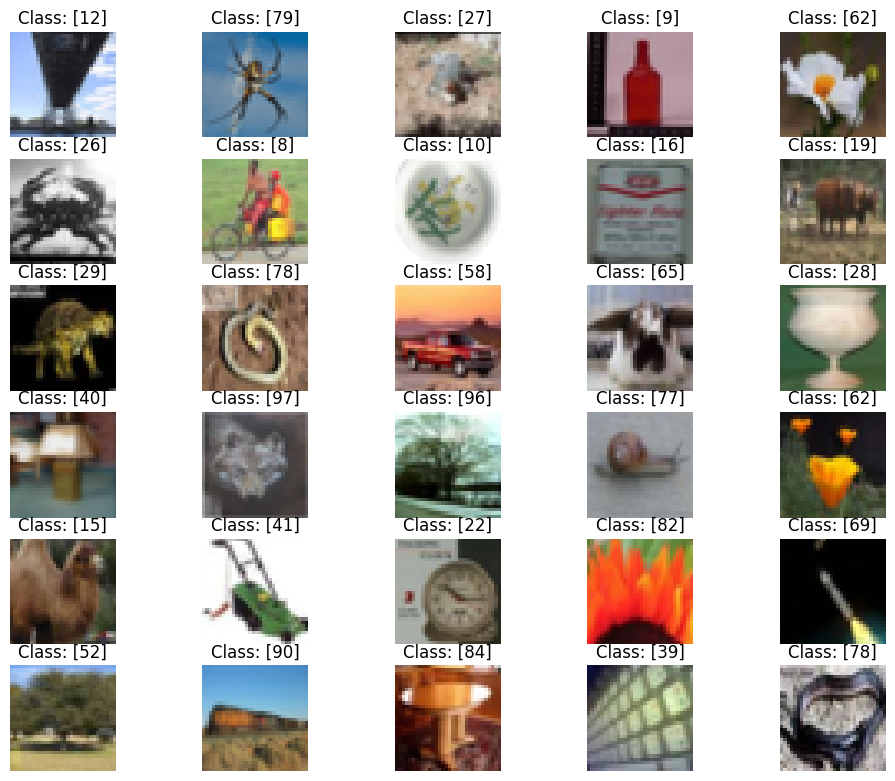

In [ ]:
# Exemplo de uso das funções
num_random_images = 30
random_images, random_labels = load_random_images(x_train, y_train, num_random_images)
plot_images(random_images, random_labels)


In [ ]:
class_counts_train = count_classes(y_train)
print("Contagem de classes no conjunto de treino:")
class_counts_train


Contagem de classes no conjunto de treino:


,Class,Count
0,0,401
1,1,409
2,2,397
3,3,406
4,4,410
...,...,...
95,95,393
96,96,397
97,97,392
98,98,403


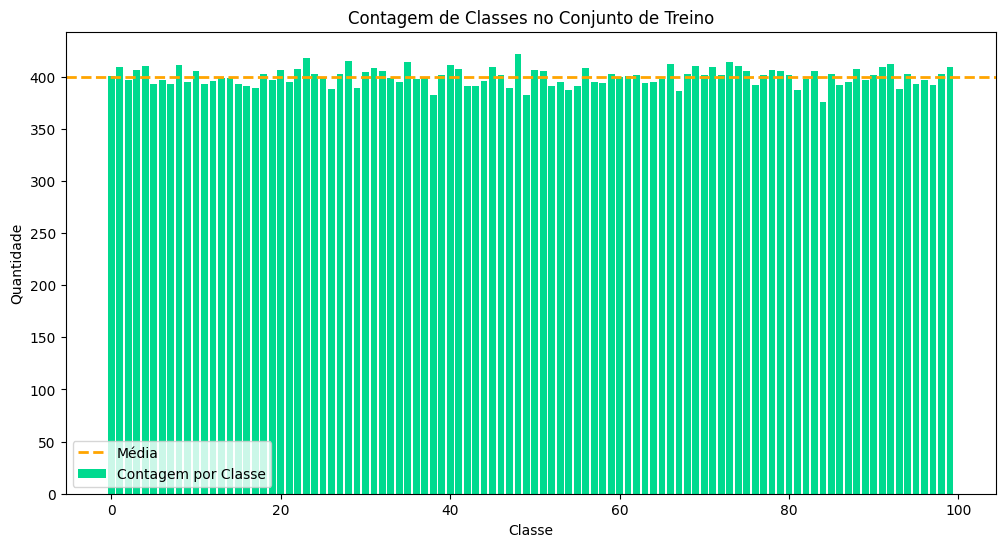

In [ ]:
# Distribuição de classes
# Criar o gráfico de barras com cor personalizada
plt.figure(figsize=(12, 6))
plt.bar(class_counts_train['Class'], class_counts_train['Count'], color='#00DA8F', label='Contagem por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Contagem de Classes no Conjunto de Treino')

# Adicionar uma linha de tendência representando a média
mean_line = class_counts_train['Count'].mean()
plt.axhline(y=mean_line, color='orange', linestyle='dashed', linewidth=2, label='Média')

plt.legend(loc='lower left')
plt.show()


# 6. Pré-processamento do Dataset

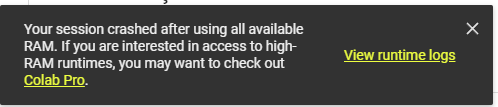

In [ ]:
# Redimensionar em lotes de 1000
# x_train = resize_batch(x_train, 100)
# x_test = resize_batch(x_test, 100)
# x_val = resize_batch(x_val, 100)

# Medir o tempo de execução
# %time
# Medir o uso de memória
# %memit


In [ ]:
# Redimensionar as imagens para o tamanho padrão das redes
x_train = np.array([cv2.resize(img, (size, size)) for img in x_train])
x_test = np.array([cv2.resize(img, (size, size)) for img in x_test])
x_val = np.array([cv2.resize(img, (size, size)) for img in x_val])

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 16.5 µs
peak memory: 2909.19 MiB, increment: 0.02 MiB


In [ ]:
# # num_classes = len(np.unique(y_train_full))
num_classes = 100

# # Realizar um one-hot encoding nas labels
# y_train = to_categorical(y_train, num_classes=num_classes)
# y_val = tf.keras.utils.to_categorical(y_val, num_classes=100)
# y_test = to_categorical(y_test, num_classes=num_classes)

# # Medir o tempo de execução
# %time
# # Medir o uso de memória
# %memit


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_train=enc.fit_transform(y_train).toarray().astype(int)
y_test=enc.transform(y_test).toarray().astype(int)
y_val=enc.transform(y_val).toarray().astype(int)


print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(40000, 100)
(10000, 100)
(10000, 100)


# Não precisa normalizar - Descobrir

In [ ]:
# # Normalizar os valores dos pixels das imagens para o intervalo de 0 a 1
# x_train = x_train.astype("float32") / 255.0
# x_val = x_val.astype("float32") / 255.0
# x_test = x_test.astype("float32") / 255.0

# # Medir o tempo de execução
# %time
# # Medir o uso de memória
# %memit


In [ ]:
# Verificação dos shapes após pré-processamento
print(f"Treino: imagens {x_train.shape}, labels {y_train.shape}")
print(f"Validação: imagens {x_val.shape}, labels {y_val.shape}")
print(f"Teste: imagens {x_test.shape}, labels {y_test.shape}")


Treino: imagens (40000, 96, 96, 3), labels (40000, 100)
Validação: imagens (10000, 96, 96, 3), labels (10000, 100)
Teste: imagens (10000, 96, 96, 3), labels (10000, 100)


# 7. Criação dos modelos

## MobileNetV2

In [ ]:
def tl_mobilenetv2(image_shape=IMG_SIZE, num_classes=100):

    # Função de pré-processamento específica para o MobileNetV2
    preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

    # Formato da imagem de entrada com 3 canais de cor (RGB)
    input_shape = image_shape + (3,)

    # Carrega o modelo MobileNetV2 treinado no conjunto de dados ImageNet, excluindo a camada densa final
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')

    # Congela o modelo base para que os pesos não sejam atualizados durante o treinamento
    base_model.trainable = False

    # Cria a camada de entrada (mesmo tamanho que a entrada do ImageNetv2)
    inputs = tf.keras.Input(shape=input_shape)

    # Pré-processamento dos dados usando os mesmos pesos que o modelo foi treinado
    x = preprocess_input(inputs)

    # Define o treinamento como False para evitar o rastreamento de estatísticas nas camadas de batch normalization
    x = base_model(x, training=False)

    # Utiliza a média global de pooling para resumir as informações em cada canal
    x = tfl.GlobalAveragePooling2D()(x)

    # Inclui dropout com probabilidade de 0.2 para evitar overfitting
    x = tfl.Dropout(0.2)(x)

    # Camada densa de saída com ativação softmax para as classes
    outputs = tfl.Dense(units=num_classes, activation='softmax')(x)

    # Cria o modelo final com a camada de entrada e a camada de saída
    model = tf.keras.Model(inputs, outputs)

    return model


In [ ]:
MobileNet = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


## EfficientNetB0

In [ ]:
# Construir o modelo EfficientNetB0 em Keras
# def tl_efficientnetb0(image_shape=IMG_SIZE, num_classes=100):

#     preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

#     input_shape = image_shape + (3,)

#     base_model = EfficientNetB0(input_shape=input_shape,
#                                 include_top=False,
#                                 weights='imagenet')

#     base_model.trainable = False  # Congelar as camadas do modelo base

#     # Entrada do modelo
#     inputs = tf.keras.Input(shape=input_shape)

#     # Camadas adicionais
#     x = base_model(inputs, training=False)

#     x = GlobalAveragePooling2D()(x)

#     x = Dropout(0.2)(x)

#     x = Dense(256, activation='relu')(x)

#     predictions = Dense(num_classes, activation='softmax')(x)

#     # Modelo final
#     model = Model(inputs=inputs, outputs=predictions)

#     model.compile(optimizer=Adam(learning_rate=0.1),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model


In [ ]:
def tl_efficientnetb0(image_shape=IMG_SIZE, num_classes=100):

    preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.EfficientNetB0(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')

    # freeze the base model by making it non trainable
    base_model.trainable = False

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape)

    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(inputs)

    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False)

    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x)

    # include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)

    outputs = tfl.Dense(units=num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    return model


In [ ]:
EfficientNetB0 = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


# 8. Treinamento dos modelos

In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Acurácia de Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Curva de Acurácia')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend(loc='upper left')
    plt.show()


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(16 * strategy.num_replicas_in_sync)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(16 * strategy.num_replicas_in_sync)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(16 * strategy.num_replicas_in_sync)

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 14.1 µs
peak memory: 2910.68 MiB, increment: 0.00 MiB


## MobileNetV2

In [ ]:
# instantiating the model in the strategy scope creates the model on the TPU
with strategy.scope():
    CIFAR_Recognizer_1 = tl_mobilenetv2(IMG_SIZE)
    CIFAR_Recognizer_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 14.3 µs
peak memory: 2917.07 MiB, increment: 0.00 MiB


In [ ]:
start_time = time.time()

history1 = CIFAR_Recognizer_1.fit(train_dataset,
                                  validation_data=val_dataset,
                                  batch_size=16 * strategy.num_replicas_in_sync,
                                  epochs=epocas,
                                  shuffle=True)



end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução do método fit:", execution_time, "segundos")

Epoch 1/30
313/313 [==============================] - 20s 41ms/step - loss: 2.1384 - accuracy: 0.4617 - val_loss: 1.4451 - val_accuracy: 0.5913
Epoch 2/30
313/313 [==============================] - 11s 34ms/step - loss: 1.3189 - accuracy: 0.6302 - val_loss: 1.3470 - val_accuracy: 0.6198
Epoch 3/30
313/313 [==============================] - 10s 32ms/step - loss: 1.1371 - accuracy: 0.6739 - val_loss: 1.3142 - val_accuracy: 0.6314
Epoch 4/30
313/313 [==============================] - 10s 32ms/step - loss: 1.0202 - accuracy: 0.7033 - val_loss: 1.3045 - val_accuracy: 0.6316
Epoch 5/30
313/313 [==============================] - 14s 44ms/step - loss: 0.9412 - accuracy: 0.7232 - val_loss: 1.2957 - val_accuracy: 0.6342
Epoch 6/30
313/313 [==============================] - 10s 31ms/step - loss: 0.8855 - accuracy: 0.7369 - val_loss: 1.2937 - val_accuracy: 0.6366
Epoch 7/30
313/313 [==============================] - 11s 34ms/step - loss: 0.8366 - accuracy: 0.7521 - val_loss: 1.3062 - val_accuracy:

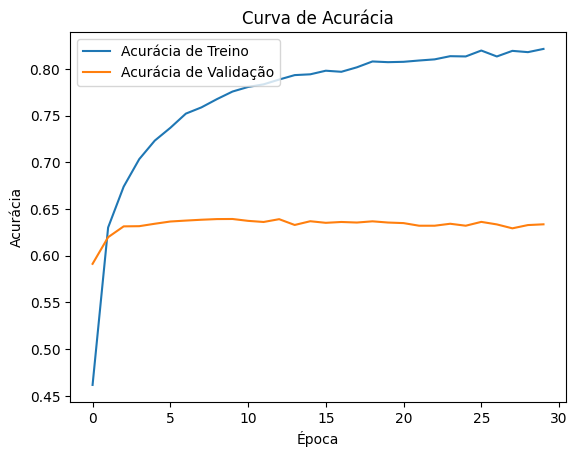

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 30 µs
peak memory: 2949.11 MiB, increment: 0.00 MiB


In [ ]:
plot_accuracy(history1)

# Medir o tempo de execução
%time
# Medir o uso de memória
%memit


## EfficientNetB0

In [ ]:
# instantiating the model in the strategy scope creates the model on the TPU
with strategy.scope():
    CIFAR_efficientnetb0 = tl_efficientnetb0(IMG_SIZE, num_classes=100)
    CIFAR_efficientnetb0.compile(optimizer=tf.keras.optimizers.Adam(),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])


In [ ]:
start_time = time.time()
history_efficientnetb0 = CIFAR_efficientnetb0.fit(train_dataset,
                                                  validation_data=val_dataset,
                                                  batch_size=16 * strategy.num_replicas_in_sync,
                                                  epochs=epocas,
                                                  shuffle=True)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução do método fit:", execution_time, "segundos")

Epoch 1/30
313/313 [==============================] - 51s 97ms/step - loss: 2.1905 - accuracy: 0.4895 - val_loss: 1.5123 - val_accuracy: 0.5991
Epoch 2/30
313/313 [==============================] - 10s 32ms/step - loss: 1.3299 - accuracy: 0.6385 - val_loss: 1.3488 - val_accuracy: 0.6311
Epoch 3/30
313/313 [==============================] - 10s 32ms/step - loss: 1.1526 - accuracy: 0.6795 - val_loss: 1.2873 - val_accuracy: 0.6438
Epoch 4/30
313/313 [==============================] - 15s 48ms/step - loss: 1.0419 - accuracy: 0.7073 - val_loss: 1.2596 - val_accuracy: 0.6499
Epoch 5/30
313/313 [==============================] - 11s 34ms/step - loss: 0.9650 - accuracy: 0.7286 - val_loss: 1.2412 - val_accuracy: 0.6536
Epoch 6/30
313/313 [==============================] - 11s 35ms/step - loss: 0.9046 - accuracy: 0.7433 - val_loss: 1.2325 - val_accuracy: 0.6575
Epoch 7/30
313/313 [==============================] - 10s 33ms/step - loss: 0.8529 - accuracy: 0.7561 - val_loss: 1.2294 - val_accuracy:

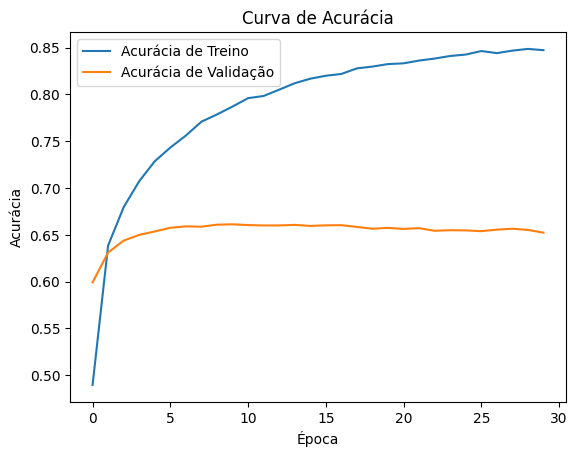

In [ ]:
plot_accuracy(history_efficientnetb0)


# Avaliação

## MobileNetV2

In [ ]:
# Avaliar o modelo
CIFAR_Recognizer_1.evaluate(test_dataset)

# Fazer previsões
y_pred = CIFAR_Recognizer_1.predict(test_dataset).argmax(axis=1)

# Extrair os rótulos verdadeiros
y_true = np.array([label.numpy() for _, label in test_dataset.unbatch()])

# Converter as previsões para rótulos multiclasse
lb = LabelBinarizer()
y_pred_multiclass = lb.fit_transform(y_pred)

# Gerar relatório de classificação
print(classification_report(y_true, y_pred_multiclass))

79/79 [==============================] - 5s 22ms/step


Exception ignored in: <function Executor.__del__ at 0x7ec99a6ee8c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       100
           1       0.81      0.75      0.78       100
           2       0.51      0.47      0.49       100
           3       0.50      0.48      0.49       100
           4       0.34      0.40      0.37       100
           5       0.65      0.66      0.65       100
           6       0.63      0.73      0.68       100
           7       0.70      0.63      0.66       100
           8       0.92      0.79      0.85       100
           9       0.82      0.78      0.80       100
          10       0.37      0.58      0.45       100
          11       0.49      0.37      0.42       100
          12       0.69      0.67      0.68       100
          13       0.56      0.69      0.62       100
          14       0.65      0.57      0.61       100
          15       0.57      0.69      0.63       100
          16       0.70      0.74      0.72       100
          17       0.80    

## EfficientNetB0

In [ ]:
# Avaliar o modelo
CIFAR_efficientnetb0.evaluate(test_dataset)

# Fazer previsões
y_pred = CIFAR_efficientnetb0.predict(test_dataset).argmax(axis=1)

# Extrair os rótulos verdadeiros
y_true = np.array([label.numpy() for _, label in test_dataset.unbatch()])

# Converter as previsões para rótulos multiclasse
lb = LabelBinarizer()
y_pred_multiclass = lb.fit_transform(y_pred)

# Gerar relatório de classificação
print(classification_report(y_true, y_pred_multiclass))

79/79 [==============================] - 17s 165ms/step


Exception ignored in: <function Executor.__del__ at 0x7ec99a6ee8c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       100
           1       0.72      0.73      0.72       100
           2       0.50      0.52      0.51       100
           3       0.46      0.51      0.48       100
           4       0.42      0.48      0.45       100
           5       0.60      0.74      0.66       100
           6       0.67      0.69      0.68       100
           7       0.77      0.73      0.75       100
           8       0.79      0.81      0.80       100
           9       0.78      0.78      0.78       100
          10       0.62      0.59      0.61       100
          11       0.36      0.35      0.36       100
          12       0.72      0.70      0.71       100
          13       0.60      0.61      0.61       100
          14       0.62      0.63      0.62       100
          15       0.64      0.65      0.65       100
          16       0.72      0.78      0.75       100
          17       0.74    

Exception ignored in: <function Executor.__del__ at 0x7ec99a6ee8c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


1/1 [==============================] - 1s 602ms/step


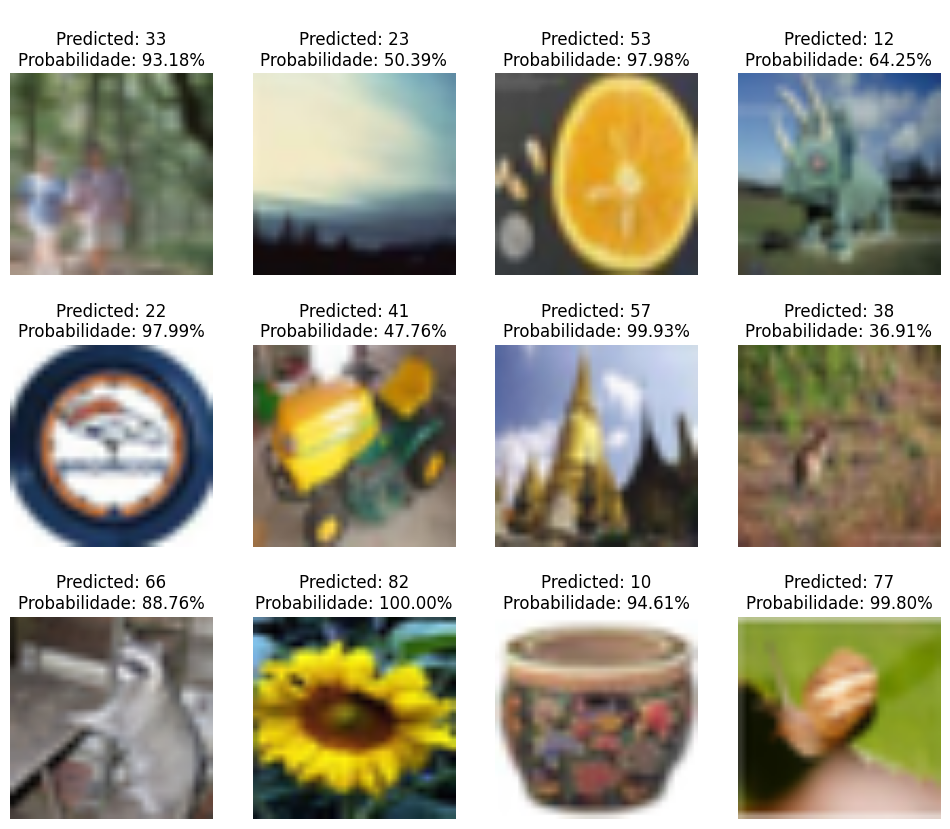

In [ ]:
import random

# Função para exibir imagens e previsões
def show_images_with_predictions(model, dataset, num_examples=12):
    # Obtendo o tamanho total do conjunto de dados
    dataset_size = len(dataset)

    # Selecionar aleatoriamente exemplos do conjunto de dados
    random_indices = np.random.choice(dataset_size, num_examples, replace=False)
    random_images = []
    true_labels = []
    predicted_labels = []

    # Obter imagens e rótulos verdadeiros
    for i, (image, label) in enumerate(dataset.unbatch().take(dataset_size)):
        if i in random_indices:
            random_images.append(image.numpy())
            true_labels.append(label.numpy()[0])  # Ajuste para obter o valor inteiro do rótulo

    # Converter as imagens para o formato necessário (adapte conforme necessário)
    random_images = np.array(random_images)

    # Fazer previsões usando o modelo
    predictions = model.predict(random_images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Criar a grade de subplots
    plt.figure(figsize=(12, 10))
    for i in range(num_examples):
        plt.subplot(3, 4, i + 1)
        plt.imshow(random_images[i])

        # Tratar rótulos como arrays
        true_label_str = str(true_labels[i])

        # Tratar predicted_labels como um único valor
        predicted_label_str = str(predicted_labels[i])

        plt.title(f'\nPredicted: {predicted_label_str}\n'
                  f'Probabilidade: {predictions[i][predicted_labels[i]] * 100:.2f}%')
        plt.axis('off')

    plt.show()

# Exemplo de uso
show_images_with_predictions(CIFAR_Recognizer_1, test_dataset)


In [ ]:
stop


NameError: name 'stop' is not defined

Recebi esse aviso com os pesos padrões

```
WARNING:tensorflow:`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
```



## <font color='red'>**STOP**</font>

In [ ]:
stop

# 8. Problemas encontrados



1. Problema de estouro de memória ao treinar as redes
2. Diferença de tamanho entre a imagem original e os modelos utilizados
3. Código muito pesado usando tf.resize na hora de redimensionar
4. Ao tentar rodar o código localmente tive diversos problemas de compatibilidade de pacotes (versões, instalação, etc.)
5. Criação de dataset



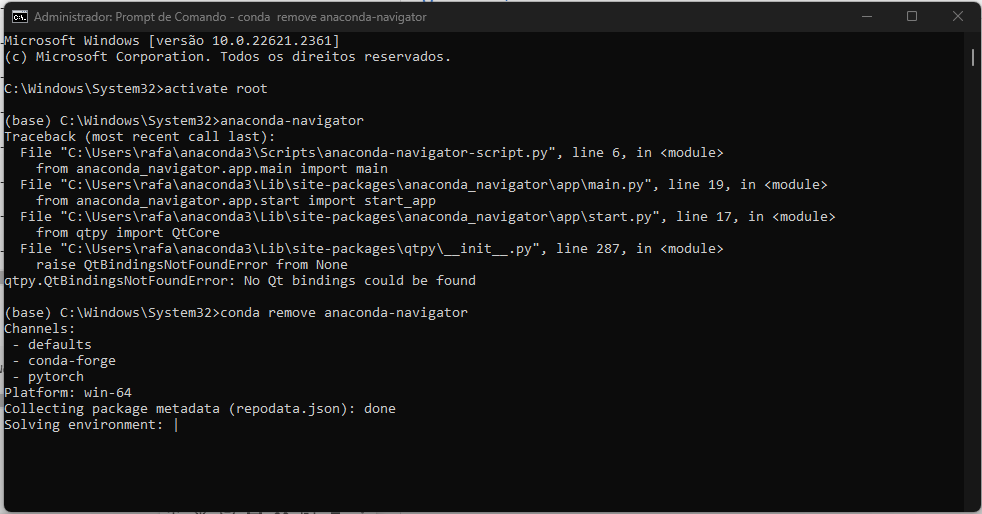

Referências

https://www.kaggle.com/code/diaaessam/transfer-learning-on-cifar-100